# Project 2: Ames Housing Data 

## Problem statement: 
### How does adding a central air conditioning unit change the house saleprice?


## Executive summary

##### In this project, a simple linear regression model approach is taken to use the Ames housing data to understand what kind of houses tend to benefit from adding a central air conditioning unit. The data has been split into that for houses with and without air conditioning. For this study, only the basic features of a house have been considered, these features include bedrooms above ground, kitchen, full baths, and ground living area. In this work, it was noticed that it is not the size of the house but the number of rooms that contributes the most to whether adding a air conditioning unit is beneficial or not.

### Contents

- [Data cleaning performed in 01_EDA_and_Cleaning.ipynb](#Exploratory-Data-Analysis)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Development](#Linear-Regression-model-to-predict-price-of-house)
- [Data Visualization](#Visualize-the-data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [150]:
pd.options.display.max_rows = 4000 
pd.options.display.max_columns = 100

In [151]:
# Reading in the cleanded Ames housing data
df_clean = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [152]:
df_clean[['saleprice','gr_liv_area','bedroom_abvgr','full_bath','kitchen_abvgr','central_air']].describe()

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,181469.701609,1499.330083,2.843491,1.577279,1.042906
std,79258.659352,500.447829,0.826618,0.549279,0.209790
min,12789.000000,334.000000,0.000000,0.000000,0.000000
25%,129825.000000,1129.000000,2.000000,1.000000,1.000000
50%,162500.000000,1444.000000,3.000000,2.000000,1.000000
75%,214000.000000,1728.500000,3.000000,2.000000,1.000000
max,611657.000000,5642.000000,8.000000,4.000000,3.000000


## Data Dictionary

Data dictionary for the dataframes relevant to this project:

|Column Name|Type|Description|
|---|---|---|
|`saleprice`|float|Sale price of the house in dollars|
|`gr_liv_area`|float|Total ground living area|
|`bedroom_abvgr`|int|Bedrooms above the ground|
|`full_bath`|int|Number of full bathrooms|
|`kitchen_abvgr`|int|Number of kitchens above ground|
|`central_air`|object|{'Y', 'N'} : Houses with or without a central air conditioning unit|


All data obtained from the Ames housing project on [Kaggle](#https://www.kaggle.com/c/dsi-us-9-project-2-regression-challenge/submissions)

Detailed data dictionary for the entire data is available [here](#http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)



## Exploratory Data Analysis (specific to the problem)

In [153]:
# Slicing the dataframe of interest to us
df_clean_slice = df_clean[['saleprice','gr_liv_area','bedroom_abvgr','full_bath','kitchen_abvgr','central_air']]

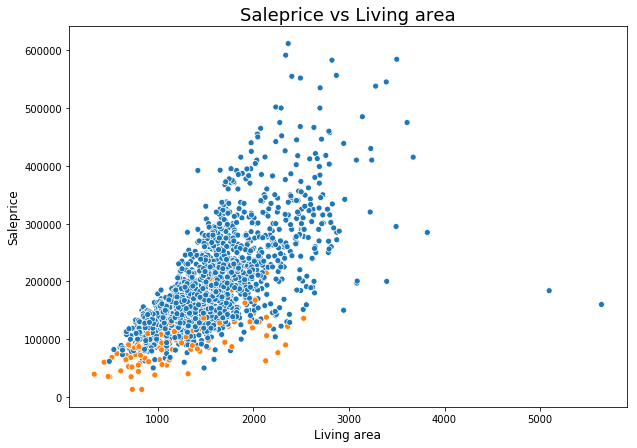

In [154]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='gr_liv_area',y='saleprice',data=df_clean_slice,hue='central_air',legend=False)
plt.title("Saleprice vs Living area", fontsize=18)
plt.xlabel('Living area',fontsize = 12)
plt.ylabel('Saleprice',fontsize = 12);

In [155]:
# Checking the percentage of information on central ac houses and no ac house
df_clean_slice['central_air'].value_counts(normalize=True)

Y    0.931253
N    0.068747
Name: central_air, dtype: float64

In [156]:
# creating a dataframe with only houses containing AC
df_clean_slice_ac = df_clean_slice[df_clean_slice['central_air'] == 'Y']
df_clean_slice_ac.reset_index(drop=True, inplace=True)
df_clean_slice_ac.head()

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr,central_air
0,130500,1479,3,2,1,Y
1,220000,2122,4,2,1,Y
2,109000,1057,3,1,1,Y
3,174000,1444,3,2,1,Y
4,138500,1445,3,2,1,Y


In [157]:
# creating a dataframe with houses containing no AC
df_clean_slice_noac = df_clean_slice[df_clean_slice['central_air'] != 'Y']
df_clean_slice_noac.reset_index(drop=True, inplace=True)
df_clean_slice_noac.head()

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr,central_air
0,98000,1344,4,1,1,N
1,145000,1056,3,1,1,N
2,119600,1991,4,2,2,N
3,131500,1795,4,2,1,N
4,122250,1740,2,1,1,N


## Linear Regression Model development

In [158]:
# Features for our model
features = list(df_clean_slice.drop(columns=['saleprice','central_air']).columns)
features

['gr_liv_area', 'bedroom_abvgr', 'full_bath', 'kitchen_abvgr']

In [159]:
# Creating the matrix for the model
X = df_clean_slice_ac[features]
X.shape

(1910, 4)

In [160]:
# Creating the saleprice vector for modeling
y = df_clean_slice_ac['saleprice']
y.shape

(1910,)

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score

In [162]:
# Instantiate a Linear Regression model
lr_ac = LinearRegression()

In [163]:
# Cross validation and train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
cross_val_score(lr_ac,X_train, y_train, cv=5).mean()

0.5843256201290843

In [164]:
# Fitting the data on houses with AC to the model
lr_ac.fit(X_train,y_train)
lr_ac.score(X_train, y_train)

0.5959576003706022

In [165]:
# Checking our model on test split
lr_ac.score(X_test,y_test)

0.57378224032595

In [166]:
# Baseprice of a house with AC
intercept_ac = lr_ac.intercept_
intercept_ac

96851.39607973247

In [167]:
# Predicting the prices of houses without AC when they upgrade
# Creating the feature matrix
X2 = df_clean_slice_noac[features]

In [168]:
# The known prices of house without AC prior to upgrade
y2 = df_clean_slice_noac['saleprice']

In [169]:
# Predicted house prices after upgrade
pred_price = lr_ac.predict(X2)
df_pred = pd.DataFrame({'predicted_saleprice':pred_price})
df_clean_slice_noac = df_clean_slice_noac.merge(df_pred, left_index=True, right_index=True)

In [170]:
# Adding an extra column with change in price
df_clean_slice_noac['difference_in_price'] = df_clean_slice_noac['predicted_saleprice'] - df_clean_slice_noac['saleprice']
df_clean_slice_noac['area_per_room'] = df_clean_slice_noac['gr_liv_area'] / df_clean_slice_noac['bedroom_abvgr']
# (df_clean_slice_noac['difference_in_price'] / df_clean_slice_noac['saleprice']).mean()

In [171]:
df_clean_slice_noac.describe()

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr,predicted_saleprice,difference_in_price,area_per_room
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,100575.078014,1229.921986,2.702128,1.319149,1.212766,139778.814266,39203.736251,475.874704
std,36971.446560,468.509126,1.067338,0.497410,0.427760,41091.505977,35801.121819,144.557919
min,12789.000000,334.000000,1.000000,0.000000,1.000000,72280.790167,-44955.932730,278.000000
25%,79000.000000,904.000000,2.000000,1.000000,1.000000,113120.736443,18931.078115,377.666667
50%,98000.000000,1133.000000,2.000000,1.000000,1.000000,126854.522858,36486.066262,448.000000
75%,125000.000000,1440.000000,3.000000,2.000000,1.000000,158182.731956,59574.418180,520.000000
max,239000.000000,2624.000000,6.000000,2.000000,3.000000,296958.636036,144321.490374,1069.000000


In [172]:
# Number of houses that showed a drop in price after upgrade
bool_price_drop = list(pred_price < y2)
# dataframe containing the information of houses that do not show increase in saleprice
price_drop_by_ac = df_clean_slice_noac[bool_price_drop]

In [173]:
# Dataframe containing houses that show an increase in saleprice upon upgrading
bool_price_raise = list(pred_price >= y2)
price_raise_by_ac = df_clean_slice_noac[bool_price_raise]

In [174]:
# Details of houses that predicted a drop in price
price_drop_by_ac.describe()

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr,predicted_saleprice,difference_in_price,area_per_room
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,137444.444444,1311.888889,3.666667,1.444444,1.333333,121039.865187,-16404.579257,365.238889
std,28547.632481,345.345503,1.084652,0.511310,0.485071,34134.333470,13172.805945,61.834274
min,98500.000000,912.000000,2.000000,1.000000,1.000000,78667.523008,-44955.932730,298.000000
25%,124500.000000,1075.250000,3.000000,1.000000,1.000000,102203.202593,-26038.014581,308.000000
50%,129500.000000,1171.000000,3.000000,1.000000,1.000000,114300.203771,-12147.952622,356.000000
75%,140625.000000,1521.000000,4.000000,2.000000,2.000000,124781.332550,-5366.786350,382.000000
max,214500.000000,2134.000000,6.000000,2.000000,2.000000,214368.945998,-131.054002,516.000000


In [175]:
# Details of houses that predicted an increase in price
price_raise_by_ac.describe()

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr,predicted_saleprice,difference_in_price,area_per_room
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,95179.560976,1217.926829,2.560976,1.300813,1.195122,142521.099497,47341.538521,492.065312
std,35001.267599,483.871006,0.992978,0.494808,0.418007,41423.286890,30391.476004,146.209258
min,12789.000000,334.000000,1.000000,0.000000,1.000000,72280.790167,597.687721,278.000000
25%,75750.000000,866.500000,2.000000,1.000000,1.000000,113120.736443,24415.414300,393.500000
50%,92900.000000,1111.000000,2.000000,1.000000,1.000000,134313.348480,42397.206109,468.000000
75%,112500.000000,1438.000000,3.000000,2.000000,1.000000,158816.206772,65378.708941,527.000000
max,239000.000000,2624.000000,6.000000,2.000000,3.000000,296958.636036,144321.490374,1069.000000


## Data Visualization

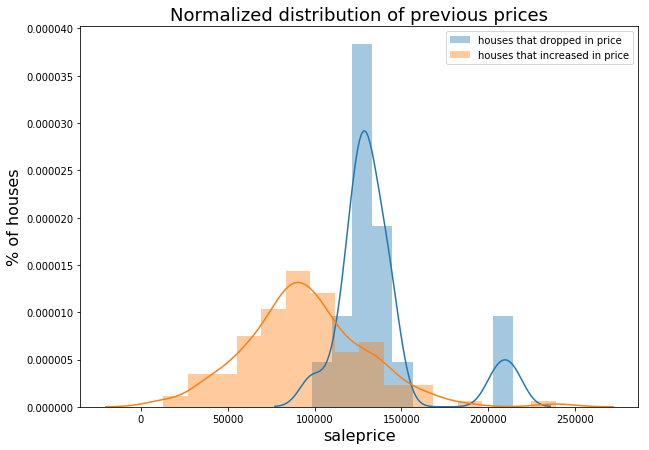

In [176]:
# Distribution of the two kinds of houses, once that increases and decreses
plt.figure(figsize=(10,7))
plt.title("Normalized distribution of previous prices", fontsize=18)
sns.distplot(price_drop_by_ac['saleprice'], label = 'houses that dropped in price')#, density=True)#, label = 'houses that dropped')
sns.distplot(price_raise_by_ac['saleprice'], label = 'houses that increased in price')#, density=True)#, alpha = 0.6, label = 'houses that increased')
plt.ylabel('% of houses', fontsize=16)
plt.xlabel('saleprice',fontsize=16)
plt.legend(loc=1);

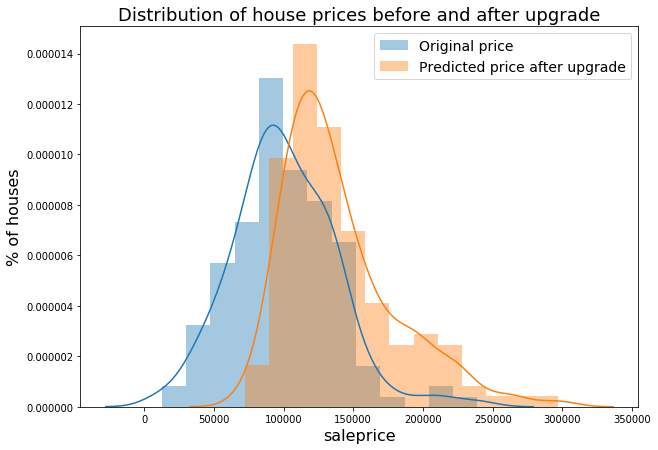

In [177]:
# Distribution of all houses that had upgrade
plt.figure(figsize=(10,7))
plt.title("Distribution of house prices before and after upgrade", fontsize=18)
sns.distplot(y2,kde=True, label='Original price')
sns.distplot(pred_price,kde=True, label='Predicted price after upgrade')
plt.ylabel('% of houses', fontsize=16)
plt.xlabel('saleprice', fontsize=16)
# plt.vlines(np.mean(y2),0,1.5E-5,colors='blue')
# plt.vlines(np.mean(pred_price),0,1.5E-5,colors='red')
plt.legend(loc=1, fontsize=14);

In [178]:
# Difference of means after upgrade for those that increases
mean_price_before = y2.mean()
mean_price_after = pred_price.mean()
print(mean_price_after, mean_price_before, mean_price_after-mean_price_before)

139778.81426567986 100575.0780141844 39203.73625149546


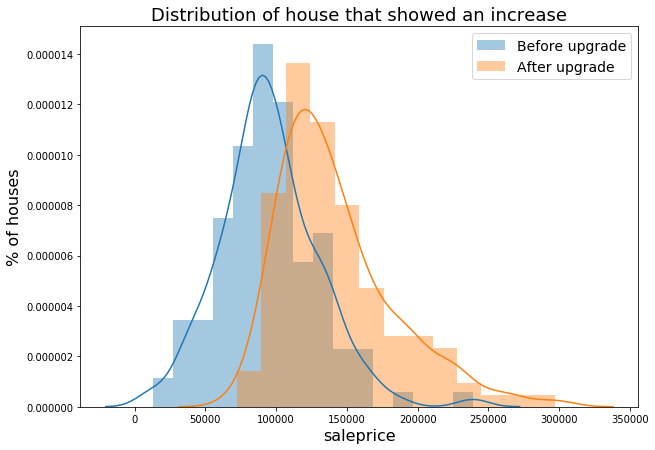

In [179]:
# Distribution of house that showed an increase
plt.figure(figsize=(10,7))
plt.title("Distribution of house that showed an increase", fontsize=18)
sns.distplot(price_raise_by_ac['saleprice'],kde=True, label='Before upgrade')
sns.distplot(pred_price[bool_price_raise],kde=True, label='After upgrade')
plt.ylabel('% of houses', fontsize=16)
plt.xlabel('saleprice', fontsize=16)
# plt.vlines(np.mean(y2),0,1.5E-5,colors='blue')
# plt.vlines(np.mean(pred_price),0,1.5E-5,colors='red')
plt.legend(loc=1, fontsize=14);

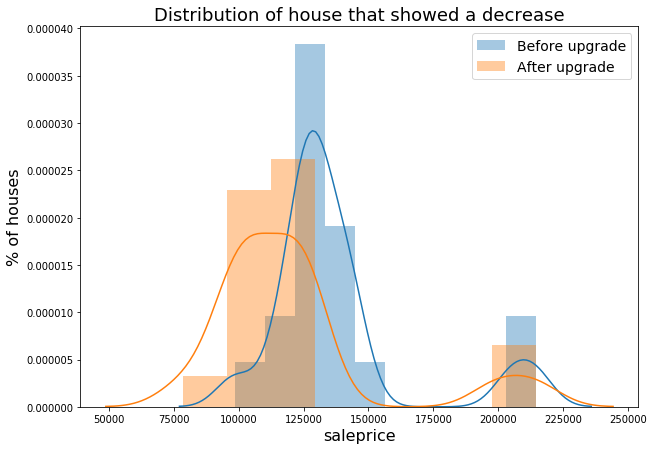

In [180]:
# Distribution of house that showed a decrease
plt.figure(figsize=(10,7))
plt.title("Distribution of house that showed a decrease", fontsize=18)
sns.distplot(price_drop_by_ac['saleprice'],kde=True, label='Before upgrade')
sns.distplot(pred_price[bool_price_drop],kde=True, label='After upgrade')
plt.ylabel('% of houses', fontsize=16)
plt.xlabel('saleprice', fontsize=16)
# plt.vlines(np.mean(y2),0,1.5E-5,colors='blue')
# plt.vlines(np.mean(pred_price),0,1.5E-5,colors='red')
plt.legend(loc=1, fontsize=14);

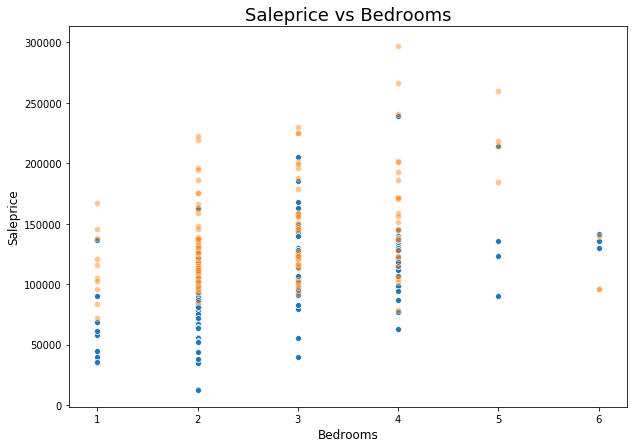

In [181]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='bedroom_abvgr',y='saleprice',data=df_clean_slice_noac,cmap = 'blue')
sns.scatterplot(x='bedroom_abvgr',y='predicted_saleprice',data=df_clean_slice_noac,cmap = 'orange',alpha=0.45)
plt.title("Saleprice vs Bedrooms", fontsize=18)
plt.xlabel('Bedrooms',fontsize = 12)
plt.ylabel('Saleprice',fontsize = 12);

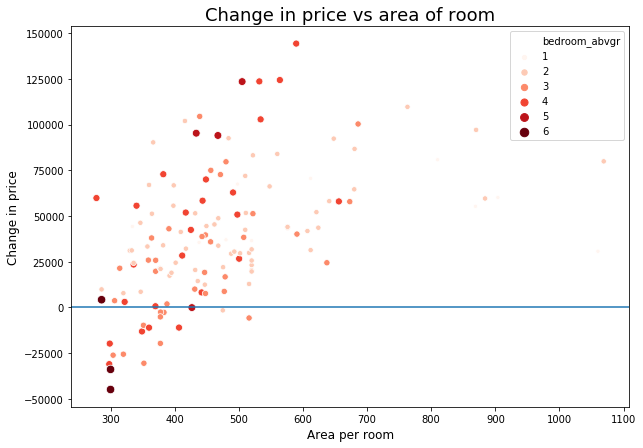

In [182]:
plt.figure(figsize=(10,7))
sns.scatterplot(df_clean_slice_noac.area_per_room, df_clean_slice_noac.difference_in_price, hue=df_clean_slice_noac.bedroom_abvgr,legend='full',size=df_clean_slice_noac.bedroom_abvgr,palette='Reds')
plt.title("Change in price vs area of room", fontsize=18)
plt.axhline(y=0)
plt.xlabel('Area per room',fontsize = 12)
plt.ylabel('Change in price',fontsize = 12);

In [183]:
mask = (df_clean_slice_noac['saleprice'] > 200_000) & (df_clean_slice_noac['saleprice'] < 225_000)
mask.sum()
df_clean_slice_noac[mask]

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr,central_air,predicted_saleprice,difference_in_price,area_per_room
20,214500,2134,5,2,1,N,214368.945998,-131.054002,426.8
75,205000,1548,3,2,1,N,199180.769283,-5819.230717,516.0


In [184]:
mask = (df_clean_slice_noac['saleprice'] > 100_000) & (df_clean_slice_noac['saleprice'] < 150_000)
mask.sum()
df_clean_slice_noac[mask].describe()

,saleprice,gr_liv_area,bedroom_abvgr,full_bath,kitchen_abvgr,predicted_saleprice,difference_in_price,area_per_room
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,122351.793103,1413.189655,3.155172,1.344828,1.206897,150075.397501,27723.604397,478.204885
std,13756.425631,408.337599,1.105040,0.479463,0.449507,40155.225922,41602.934812,158.745496
min,101000.000000,872.000000,1.000000,1.000000,1.000000,96044.067270,-44955.932730,286.000000
25%,108750.000000,1116.500000,2.000000,1.000000,1.000000,123284.028439,-1081.000764,377.750000
50%,124000.000000,1312.000000,3.000000,1.000000,1.000000,138937.993612,20862.371410,447.500000
75%,134125.000000,1704.250000,4.000000,2.000000,1.000000,167035.901591,51586.790844,504.400000
max,149000.000000,2526.000000,6.000000,2.000000,3.000000,266321.490374,144321.490374,1069.000000


## Conclusions and Recommendations

For the data that we have obtained and analyzed, we have made the following inference and conclusions:

* We have fit a Linear Regression model that has a low variance and high bias, giving a r2 score of around 0.58
* We observe that adding a central air conditioning unit increases the saleprice of a property by 60% on average
* The houses that showed a decrease in saleprice, upon upgrading to a central air-conditioning, are the houses with more bedrooms (median number of rooms around 3.5, compared 2.5 of houses that increased in price)
* These houses, however, show lesser area per rooms, showing that it is not in the size of the room but the number of rooms which decides the increase or decrease in saleprice (difference of about 100 square units between the two kinds of houses)
* Houses of average saleprice lesser than 100,000 benefit more from adding a central air unit
* All the other parameters considered in this model seem to have minimal contribution to the end result as is evident from the almost similar statistics with respect to these parameters

From the analysis it is clear that adding a central air conditioning unit would be great idea to increase your saleprice (60% increase!), however, this is a better strategy for houses with 3 or lesser bedrooms.